# Алгоритмы кластеризации. Параллельные алгоритмы на Python

Сначала нам необходимо подключить следующие библиотеки. Если вдруг у вас возникнут какие-либо проблемы с импортом библиотек, необходимо открыть командную строку и набрать "pip install <ИМЯ_БИБЛИОТЕКИ>", например "pip install seaborn". После этого
попробуйте запустить блок кода снова. 

P.S. Если в дальнейшем увлечетесь машинным обучением или разработкой, лучше создавайте виртуальное окружение и устанавливайте библиотеки туда. Можете почитать про это здесь - https://devpractice.ru/python-lesson-17-virtual-envs/, или же это достаточно просто можно загуглить, попробуйте ключевые слова "виртуальное окружение python".

In [4]:
# Загрузка всех необходимых библиотек
import pandas as pd                       # Библиотека для работы с данными в табличном виде (в виде датафреймов)
import numpy as np                        # Библиотека для работы с матрицами
import seaborn as sns                     # Визуализации 
import matplotlib.pyplot as plt           # Визуализации
import multiprocessing as mp              # Организует параллельность
from multiprocessing.dummy import Pool

import timeit                             # Для замеров времени работы
from time import time                 

from sklearn import preprocessing         # Для предобработки данных

# Чтобы нам не сыпались предупреждения во время работы - уберем их
import warnings 
warnings.filterwarnings('ignore')

Количество ядер на компьютере можно посмотреть следующей командой

In [5]:
print("Количество ядер: ", mp.cpu_count())

Количество ядер:  2


## Загрузка данных
Датасет взят с ресурса "kaggle" - https://www.kaggle.com/mirichoi0218/insurance. Это место, где проводятся соревнования по машинному обучению, очень популярная площадка, где имеются реальные наборы данных, и множество людей могут попробовать решить определенную задачу по этим данным. И, если повезет, еще получить за свою модель приз.

### Описание датасета

age: возраст (годы)

sex: пол (male, female)

bmi: Индекс массы тела, кг/м^2 ("ideally" 18.5 to 24.9)

children: количество детей с медицинским страхованием

smoker: курит или нет

region: жилой район в США (Северный, южный, западный или восточный)

charges: медицинские расходы, оплачиваемые медицинской страховкой

In [6]:
dataset = pd.read_csv('D:\insurance.csv', delimiter = ',')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Построим картинку, на которой отображены попарные зависимости признаков друг от друга, подобный прием бывает очень полезен чтобы оценить наш набор данных перед началом работы.

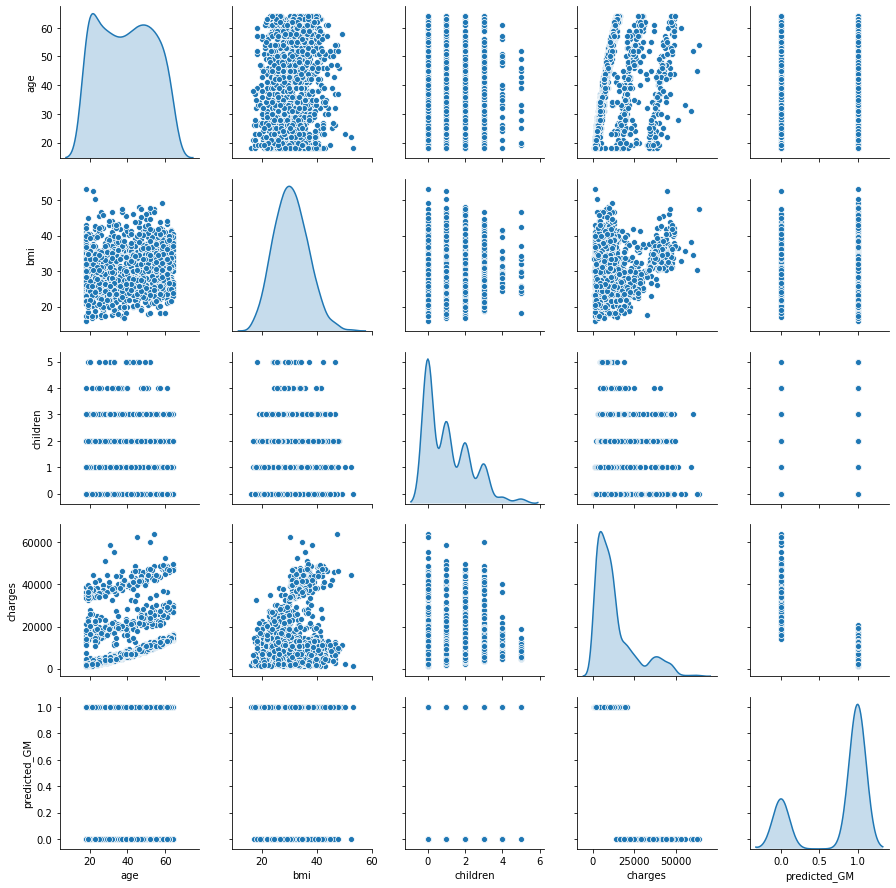

In [29]:
sns.pairplot(dataset, diag_kind ='kde', markers='o')

На Kaggle в качестве задания стоит следующая фраза - "Сможете ли вы точно предсказать стоимость страхования?". Это задача регрессии, мы же сейчас займемся кластеризацией, то есть перед нами стоит задача группировки множества объектов на подмножества (кластеры). 

Для разбиения множества наших объектов на 2 подмножества нам понадобятся всего два вещественных признака - "Размер медицинской страховки" и "Индекс массы тела". По этим двум признакам мы попробуем произвести разбиение наших данных. В контексте данной задачи и для того, чтобы была возможность проверить качество кластеризации - разделим всех на курящих и не курящих (столбец "smoker" в датасете). Покажем разбиение на графике.

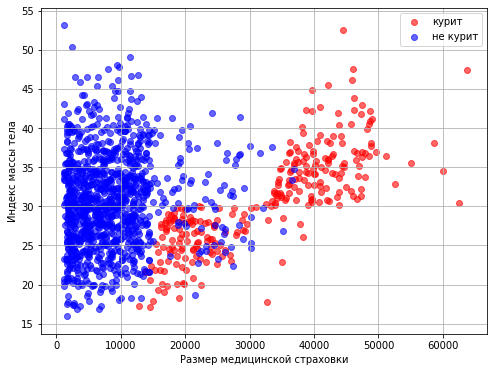

In [16]:
# Этот кусок кода нужен для того, чтобы отображать картинку нужного нам размера
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

# Иногда стоит попробовать самые разные сочетания признаков:
param_1 = 'charges'
param_2 = 'bmi'

param_1_yes = dataset[dataset.smoker == 'yes'][param_1]
param_1_no = dataset[dataset.smoker == 'no'][param_1]

param_2_yes = dataset[dataset.smoker == 'yes'][param_2]
param_2_no = dataset[dataset.smoker == 'no'][param_2]

plt.scatter(param_1_yes, param_2_yes, c = 'red', alpha = 0.6, label = 'курит')
plt.scatter(param_1_no, param_2_no, c = 'blue', alpha = 0.6, label = 'не курит')
plt.xlabel('Размер медицинской страховки')
plt.ylabel('Индекс массы тела')
plt.legend(loc = 'best')
plt.grid()
plt.show()

Теперь представим такую ситуацию: мы не имеем данных о том, курит человек, или нет. Представим, что в нашей таблице вообще нет столбца "smoker". Но нам каким-либо образом нужно разбить выборку на части. Для этого применим алгоритм кластеризации.

In [22]:
# Загружаем набор данных
X = np.array(dataset[['charges','bmi']])
# Стандартизуем выборку
X = preprocessing.scale(X)

# Готовимся кластеризовать
from sklearn.mixture import GaussianMixture

# Вызываем модель
gmm = GaussianMixture(n_components = 2)
# "Обучаем" её
gmm.fit(X)
# Расставляем метки на всем наборе данных
predicted = gmm.predict(X)
dataset['predicted_GM'] = predicted

Визуализируем результат работы нашего алгоритма.

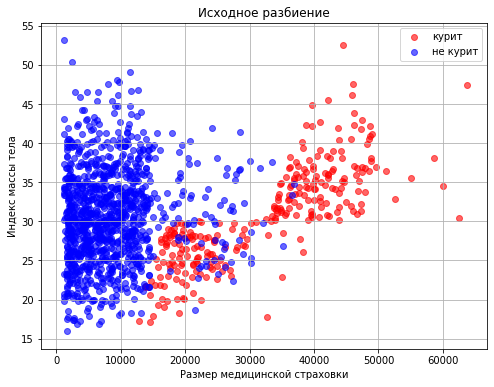

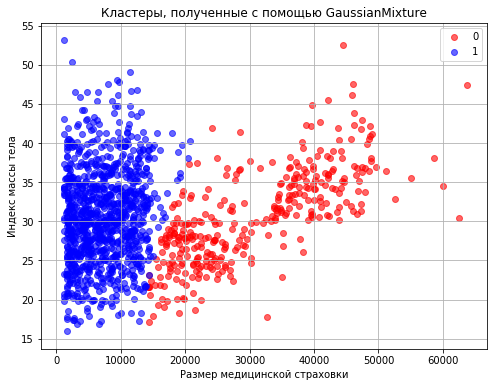

In [23]:
plt.scatter(param_1_yes, param_2_yes, c = 'red', alpha = 0.6, label = 'курит')
plt.scatter(param_1_no, param_2_no, c = 'blue', alpha = 0.6, label = 'не курит')
plt.xlabel('Размер медицинской страховки')
plt.ylabel('Индекс массы тела')
plt.legend(loc = 'best')
plt.title('Исходное разбиение')
plt.grid()
plt.show()

param_1_yes_pr = dataset[dataset.predicted_GM == 0][param_1]
param_1_no_pr = dataset[dataset.predicted_GM == 1][param_1]

param_2_yes_pr = dataset[dataset.predicted_GM == 0][param_2]
param_2_no_pr = dataset[dataset.predicted_GM == 1][param_2]

plt.scatter(param_1_yes_pr, param_2_yes_pr, c = 'red', alpha = 0.6, label = '0')
plt.scatter(param_1_no_pr, param_2_no_pr, c = 'blue', alpha = 0.6, label = '1')
plt.xlabel('Размер медицинской страховки')
plt.ylabel('Индекс массы тела')
plt.legend(loc = 'best')
plt.title('Кластеры, полученные с помощью GaussianMixture')
plt.grid()
plt.show()

Неплохо! Теперь попробуем другой алгоритм - великий и могучий "K-средних".

In [6]:
from sklearn.cluster import KMeans # Алгоритм K-средних

# Вызываем модель
k_means = KMeans(n_clusters = 2)
# "Обучаем" её
k_means.fit(X)
# Расставляем метки на всем наборе данных
predicted = k_means.predict(X)
dataset['predicted_kmeans'] = predicted

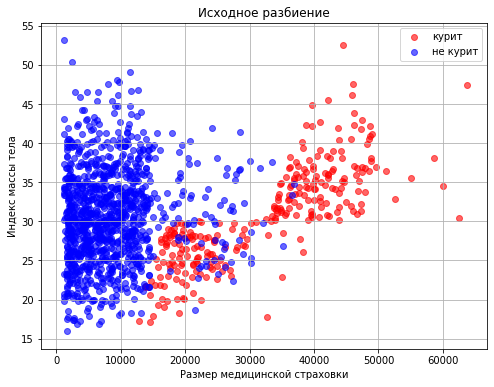

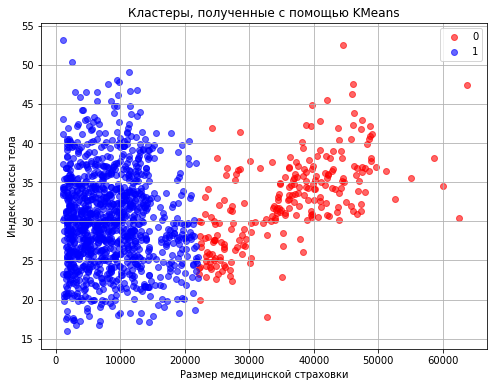

In [183]:
plt.scatter(param_1_yes, param_2_yes, c = 'red', alpha = 0.6, label = 'курит')
plt.scatter(param_1_no, param_2_no, c = 'blue', alpha = 0.6, label = 'не курит')
plt.xlabel('Размер медицинской страховки')
plt.ylabel('Индекс массы тела')
plt.legend(loc = 'best')
plt.title('Исходное разбиение')
plt.grid()
plt.show()

param_1_yes_pr = dataset[dataset.predicted_kmeans == 0][param_1]
param_1_no_pr = dataset[dataset.predicted_kmeans == 1][param_1]

param_2_yes_pr = dataset[dataset.predicted_kmeans == 0][param_2]
param_2_no_pr = dataset[dataset.predicted_kmeans == 1][param_2]

plt.scatter(param_1_yes_pr, param_2_yes_pr, c = 'red', alpha = 0.6, label = '0')
plt.scatter(param_1_no_pr, param_2_no_pr, c = 'blue', alpha = 0.6, label = '1')
plt.xlabel('Размер медицинской страховки')
plt.ylabel('Индекс массы тела')
plt.legend(loc = 'best')
plt.title('Кластеры, полученные с помощью KMeans')
plt.grid()
plt.show()

Как видно из графиков наши алгоритмы справляются с поставленной задачей, и выделяют, стоит заметить, вполне похожие на истинное разбиение, кластеры. Но какой алгоритм справляется лучше? - Давайте сравним наши алгоритмы с помощью метрик.

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score

# Если мы знаем исходное разбиение на классы
print('Adjusted Rand index для Гауссовой смеси -', adjusted_rand_score(dataset['smoker'], dataset['predicted_GM']))
print('Adjusted Rand index для k-средних -', adjusted_rand_score(dataset['smoker'], dataset['predicted_kmeans']), '\n')

from sklearn.metrics.cluster import silhouette_score

# Если мы этого не знаем
print('Silhouette Coefficient для Гауссовой смеси -', silhouette_score(X, dataset['predicted_GM']))
print('Silhouette Coefficient для k-средних -', silhouette_score(X, dataset['predicted_kmeans']))

Adjusted Rand index для Гауссовой смеси - 0.7719292455272906
Adjusted Rand index для k-средних - 0.5871346375691388 

Silhouette Coefficient для Гауссовой смеси - 0.6792014955198206
Silhouette Coefficient для k-средних - 0.7335587359346507


<div align="justify">Adjusted Rand index принимает значения в диапазоне от -1 до 1, где при 0 - разбиение является случайным, при значениях, близких к 1 - говорят, что 2 разбиения схожи.</div>


<div align="justify">Силуэт же не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации. Силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Данная величина лежит в диапазоне от -1 до 1. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам.</div>

Таким образом мы можем выбирать ниаболее подходящий алгоритм для нашей задачи.

## Насколько быстро работает алгоритм в однопоточном режиме

Теперь мы попробуем разобраться насколько долго будет работать алгоритм кластеризации K-средних при работе в однопоточном режиме - для этого мы 10 раз запустим и засечем время для нашего алгоритма на случайно сгенерированных выборках. Результат мы выведем на экран.

In [185]:
k_means_1_times = []
for i in range(0,10):
    # Типо наша обучающая выборка размером в 20 тысяч объектов и 10 признаков (матрица из случайных элементов)
    X = np.random.rand(20000,10)
    start = timeit.default_timer()
    
    k_means = KMeans(n_clusters = 2)
    # "Обучаем" её
    k_means.fit(X)
    # Расставляем метки на всем наборе данных
    predicted = k_means.predict(X)
    
    k_means_1_times.append(timeit.default_timer()-start)

k_means_1_times = np.array(k_means_1_times)
print(k_means_1_times)

[1.0132998 0.9565625 0.7245346 0.7076309 0.8105466 0.8713144 0.8533882
 0.9279773 0.8353288 0.9309157]


## Насколько быстрее он может быть?

Теперь мы проведем точно такой же эксперимент, только в коде добавим всего одну запись - "n_jobs = 2". Это встроенная в библиотеку sklearn реализация параллельности. n_jobs просит передать ему количество ядер для использования, мы устанавливаем значение - 2.

In [195]:
k_means_2_times = []
for i in range(0,10):
    # Типо наша обучающая выборка размером в 20 тысяч объектов и 10 признаков
    X = np.random.rand(20000,10)
    start = timeit.default_timer()
    
    k_means = KMeans(n_clusters = 2, n_jobs = 2)
    # "Обучаем" её
    k_means.fit(X)
    # Расставляем метки на всем наборе данных
    predicted = k_means.predict(X)
    
    k_means_2_times.append(timeit.default_timer()-start) 

k_means_2_times = np.array(k_means_2_times)
print(k_means_2_times)

[0.6710244 0.7066416 0.6649171 0.649845  0.6850202 0.7139455 0.7211071
 0.6999485 0.6344651 0.6457404]


Теперь нарисуем "ящики с усами" для того, чтобы можно было быстро и удобно сравнить результаты.

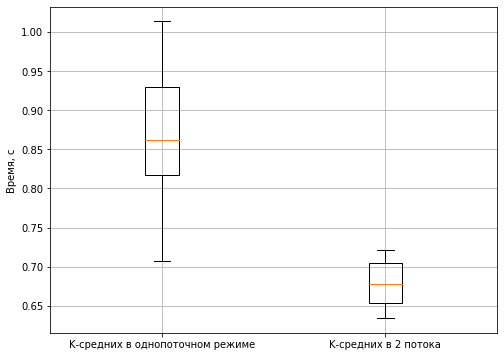

Было, с - 0.8631498799998554
Стало, с - 0.6792654899999434
Мы получили уменьшение времени работы на - 21.303877143555038 %


In [196]:
# Нарисуем график для сравнения
plt.boxplot((k_means_1_times, k_means_2_times), 
            notch=False, sym="o",labels=["K-средних в однопоточном режиме", "K-средних в 2 потока"])
plt.ylabel('Время, с')
plt.grid()
plt.show()

print('Было, с -', np.mean(k_means_1_times))
print('Стало, с -', np.mean(k_means_2_times))
print('Мы получили уменьшение времени работы на -', 
      (1 - np.mean(k_means_2_times)/np.mean(k_means_1_times))*100, '%')

<div align="justify">Да, действительно, добавив всего несколько команд в наш код, нам удалось добиться небольшого ускорения во времени работы алгоритма. Стоит обратить внимание, что мы использовали всего 2 ядра, если на вашем компьютере есть возможность использовать большее количество ядер - делайте это!</div>

## А что если мы ищем лучший из нескольких алгоритмов?

Когда мы проводим какие либо исследования, нам очень важно бывает попробовать несколько алгоритмов, потому что заранее, даже имея за плечами определенный опыт в применении машинного обучения, наверняка угадать сложно, какой из алгоритмов на наших данных окажется наиболее эффективным.

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

Теперь запустим 4 алгоритма кластеризации с выводом метрик последовательно.

In [9]:
data = np.array(dataset[['charges','bmi']])
# Стандартизуем выборку
data = preprocessing.scale(data)

start = timeit.default_timer() # Засекаем время

# Сначала k-средних как самый простой алгоритм
k_means = KMeans(n_clusters = 2)
k_means.fit(data)
predicted_k_means = k_means.predict(data)
print('Adjusted Rand index для KMeans -', adjusted_rand_score(dataset['smoker'], predicted_k_means))

# Затем Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters = 2)
agg.fit(data)
predicted_agg = agg.labels_
print('Adjusted Rand index для AgglomerativeClustering -', adjusted_rand_score(dataset['smoker'], predicted_agg))

# Теперь DBSCAN
db_clustering = DBSCAN(eps=3, min_samples=2)
db_clustering.fit(data)
predicted_db = db_clustering.labels_
print('Adjusted Rand index для DBSCAN -', adjusted_rand_score(dataset['smoker'], predicted_db))

# И последний алгоритм
gmm = GaussianMixture(n_components = 2)
gmm.fit(data)
predicted_gmm = gmm.predict(data)
print('Adjusted Rand index для GaussianMixture -', adjusted_rand_score(dataset['smoker'], predicted_gmm))

print(timeit.default_timer() - start) # Время работы алгоритмов

Adjusted Rand index для KMeans - 0.5871346375691388
Adjusted Rand index для AgglomerativeClustering - 0.7108547789928544
Adjusted Rand index для DBSCAN - -0.13135162153582045
Adjusted Rand index для GaussianMixture - 0.7719292455272906
0.3243461000000707


Вся наша "связка" отработала за 0.32 секунды, что очень даже неплохо, но стоит держать в голове, что размер нашего датасета не очень большой, всего 1338 объектов по 2 признака. Чаще всего вы будуете иметь дело с куда бОльшими объемами данных.

Теперь мы обернем все наши алгоритмы в функцию, которая принимает на вход название метода (алгоритма кластеризации) и данные, которые нужно кластеризовать.

In [13]:
def cluster(method, X = data):
    if method == 'KMeans':
        k_means = KMeans(n_clusters = 2)
        k_means.fit(X)
        predicted_k_means = k_means.predict(X)
        print('Adjusted Rand index для KMeans -', adjusted_rand_score(dataset['smoker'], predicted_k_means))
    elif method == 'AgglomerativeClustering': 
        agg = AgglomerativeClustering(n_clusters = 2)
        agg.fit(X)
        predicted_agg = agg.labels_
        print('Adjusted Rand index для AgglomerativeClustering -', adjusted_rand_score(dataset['smoker'], predicted_agg))
    elif method == 'DBSCAN':
        db_clustering = DBSCAN(eps=3, min_samples=2)
        db_clustering.fit(X)
        predicted_db = db_clustering.labels_
        print('Adjusted Rand index для DBSCAN -', adjusted_rand_score(dataset['smoker'], predicted_db))
    elif method == 'GaussianMixture':
        gmm = GaussianMixture(n_components = 2)
        gmm.fit(X)
        predicted_gmm = gmm.predict(X)
        print('Adjusted Rand index для GaussianMixture -', adjusted_rand_score(dataset['smoker'], predicted_gmm))

# Сводим их в объект, пригодный для того, чтобы по нему можно было "итерировать"
methods = ['KMeans', 'AgglomerativeClustering', 'DBSCAN', 'GaussianMixture']

<div align="justify">Теперь запускаем наш алгоритм на 2х ядрах при помощи модуля multiprocessing. Здесь стоит заострить наше внимание на конструкции: "pool.map(cluster, methods)". map в данном случае, это метод, который принимает на вход два аргумента - функцию и итерабельный объект, который можно подставлять в функцию.</div> 

<div align="justify">То есть, в map() мы сначала передаем объявленную выше функцию cluster, которой на вход нужно передать аргумент - название алгоритма кластеризации. Подаем мы названия в виде списка methods, который состоит как раз из названий алгоритмов. map последовательно каждому из процессов выдает свою порцию - функцию cluster и название алгоритма кластеризации method, и отправляет работать. Затем, не дожидаясь, пока первый закончит работу, своё задание получает уже следующий процесс - он получает ту же функцию cluster, но уже с другим названием метода. Так как мы указали всего 2 процесса, то одновременно работать могут всего два алгоритма кластеризации, поэтому, когда первый (или второй, это зависит от скорости работы алгоритма) алгоритм кластеризации закончит работу, мы освободившемуся процессу даем новую порцию заданий. Так продолжается до того момента, пока у нас не закончатся названия методов в списке methods.</div>  

In [14]:
if __name__ == '__main__':
    pool = Pool(2) # Работать мы будем в 2 процесса

    start = timeit.default_timer() # Засекаем время

    result = pool.map(cluster, methods)
    pool.close()
    pool.join()

    print(timeit.default_timer()-start) # Время работы алгоритма

Adjusted Rand index для AgglomerativeClustering - 0.7108547789928544
Adjusted Rand index для DBSCAN - -0.13135162153582045
Adjusted Rand index для KMeans - 0.5871346375691388
Adjusted Rand index для GaussianMixture - 0.7719292455272906
0.19902369999999792


Наш алгоритм отработал за 0.19 с. Такой прирост в скорости может показаться незначительным, но на крупных выборках разница во времени работы будет ощутима.

Обратим внимание на последовательность вывода метрик, когда мы запускали в однопоточном режиме наши алгоритмы, то мы получили следующую последовательность:
 - сначала закончил работать KMeans
 - AgglomerativeClustering
 - DBSCAN
 - GaussianMixture

Что же получилось во втором случае (при этом подавали мы алгоритмы в той же самой последовательности, что и в первом случае):
 - сначала AgglomerativeClustering
 - DBSCAN
 - KMeans
 - GaussianMixture

В данном случае нам это не сильно помешает для анализа. Однако нужно держать в голове, что в зависимости от задачи, некоторые процессы могут заканчивать свою работу несколько быстрее, чем другие. Сейчас же это привело к тому, что, в то время как один процесс успел применить на данных два алгоритма кластеризации (AgglomerativeClustering и DBSCAN), другой смог разобраться только с KMeans.

## Dask

Dask - это библиотека для параллельных вычислений в Python. Dask нам поможет, если датасет не умещается в оперативной памяти компьютера.

Импортируем все необходимое. Но до этого нам необходимо все установить, здесь есть подробная инструкция, как это сделать - https://docs.dask.org/en/latest/install.html

In [ ]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

Сгенерируем нашу выборку и разделим её на 10 частей. Ниже будет показана некоторая статистика по нашему датасету: сколько весит весь массив целиком, сколько весить каждая его часть (chunk), сколько всего частей и т.д.

In [2]:
X, y = dask_ml.datasets.make_blobs(n_samples=10000000,
                                   chunks=1000000,
                                   random_state=0,
                                   centers=3)
# Сохранение массива в памяти
X = X.persist()
X

dask.array<concatenate, shape=(10000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

Как загружать датафрейм из файла csv - можно почитать здесь https://docs.dask.org/en/latest/dataframe.html 

Мы точно так же запускаем алгоритм кластеризации K-средних, как и в предыдущих примерах, и отрисовываем результат.

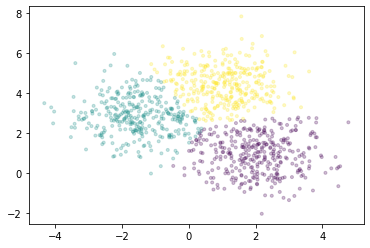

In [3]:
km = dask_ml.cluster.KMeans(n_clusters = 3, init_max_iter = 2, oversampling_factor = 10) # Тот же самый k-средних
km.fit(X) # Обучаем алгоритм

fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker = '.', c = km.labels_[::10000],
           cmap = 'viridis', alpha = 0.25);

Поздравляю, Вы освоили некоторые возможности в Python'е для распараллеливания вычислений, надеюсь, данный материал поможет Вам в Ваших исследованиях!